In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/salary.csv


CSV Import

In [70]:
salary = pd.read_csv('/kaggle/input/salary/salary.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Assign CSV Data

In [71]:
X = salary['YearsExperience'].values
y = salary['Salary'].values

In [72]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5, 11.2, 11.5, 12.3,
       12.9, 13.5])

In [73]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

Reshape the Data to what train_test_split wants

In [74]:
X = X.reshape(-1, 1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

- Keep Track of our Data
- X feature = Years of Experience
- y = salary in $
- sklearn.model_selection.train_test_split(*arrays, **options) -> list

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, test_size=.4, random_state=100)

In [76]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (21, 1)
y_train shape (21,)
X_test shape (14, 1)
y_test shape (14,)


## Visualize our Data

Text(0, 0.5, 'Salary in $')

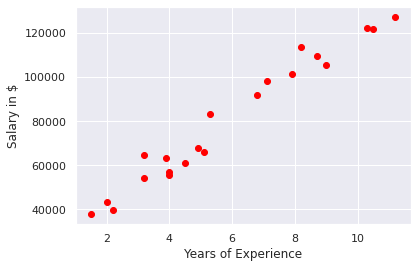

In [77]:
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

In [79]:
print(f'Trainining Acc {round(lm.score(X_train, y_train) * 100, 2)}%')
print(f'Testing Acc {round(lm.score(X_test, y_test) * 100, 2)}%')

Trainining Acc 96.61%
Testing Acc 93.83%


In [80]:
import seaborn as sns

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

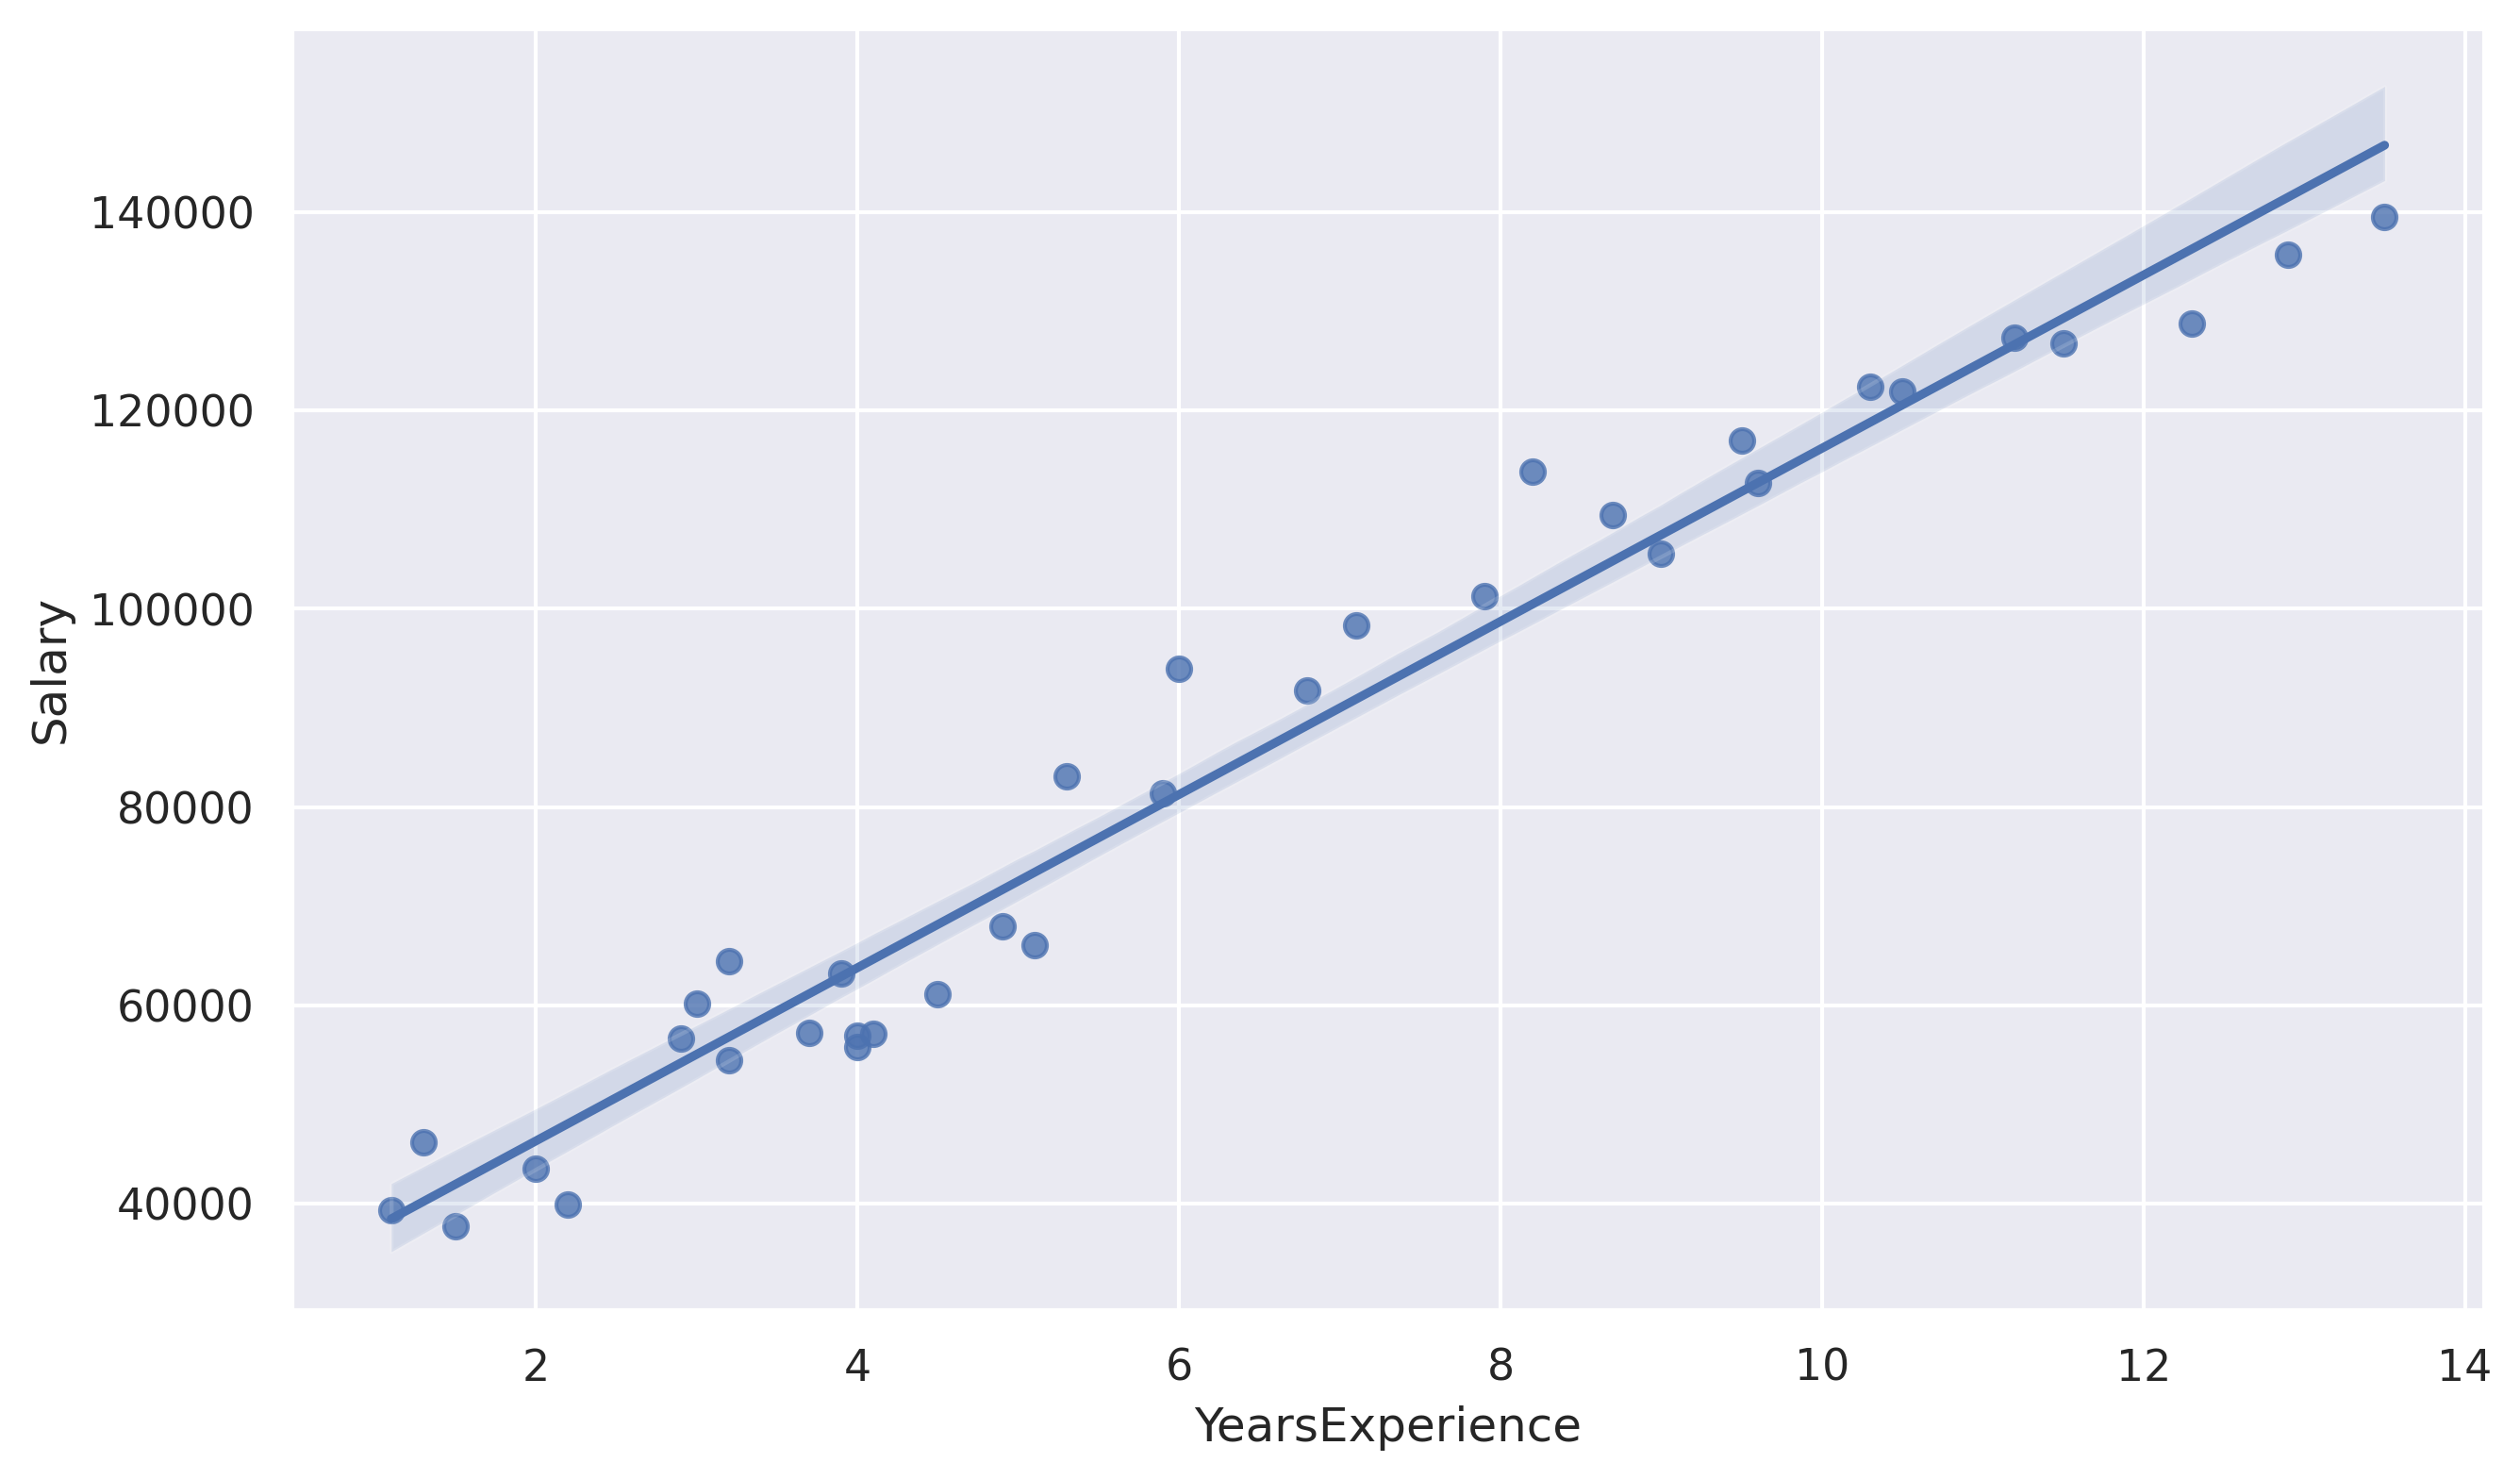

In [81]:
sns.set()
plt.figure(figsize=(10,6), dpi=300)
sns.regplot(x='YearsExperience', y="Salary", data=salary)